# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [2]:
data = pd.read_csv("final_train.csv")
data = data.drop(columns = ["Unnamed: 0"])
data.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


# Data understanding

In [3]:
set(data.Activity)

{'LAYING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

In [4]:
# Wypisanie liczby cech oraz obserwacji
print("Liczba cech:",data.shape[1])
print("Liczba obserwacji:",data.shape[0])

Liczba cech: 572
Liczba obserwacji: 11086


# Filling missing data

In [5]:
print("Number of missing data: " + str(sum(data.isna().sum())))
data.isna().sum()
data = data.fillna(data.mean())
print(data.isna().sum())

Number of missing data: 32636
Activity                                0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
angle(tBodyAccJerkMean),gravityMean)    0
                                       ..
tGravityAccMag-mean()                   0
tGravityAccMag-min()                    0
tGravityAccMag-sma()                    0
tGravityAccMag-std()                    0
void()                                  0
Length: 572, dtype: int64


# Data Visualisation

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit_transform(data.drop(columns = ["Activity"]))

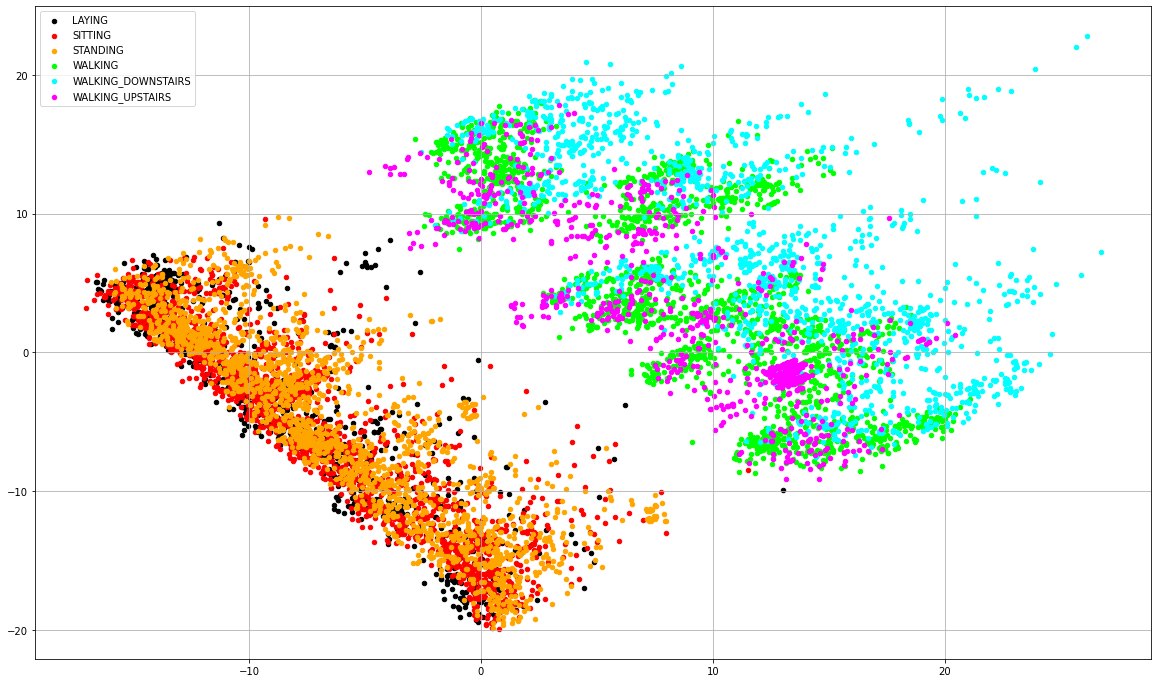

In [7]:
point_size = 20
colors = ['black', 'red', 'orange', 'lime', 'cyan', 'magenta']
labels = ['LAYING',
         'SITTING',
         'STANDING',
         'WALKING',
         'WALKING_DOWNSTAIRS',
         'WALKING_UPSTAIRS']

fig, ax = plt.subplots(figsize=(20, 12))
for color, label in zip(colors, labels):
    ax.scatter(pca[:,0][data.Activity.to_numpy()==label], 
               pca[:,1][data.Activity.to_numpy()==label], 
               s = point_size, 
               color = color, 
               label = label)
    
ax.legend()
ax.grid(True)
plt.show()

# Data modifications
---

### Encode activities

In [8]:
encode = {'LAYING' : 0,
         'SITTING' : 1,
         'STANDING' : 2,
         'WALKING' : 3,
         'WALKING_DOWNSTAIRS' : 4,
         'WALKING_UPSTAIRS' : 5}

data = data.replace({"Activity" : encode})

### Reduction of multidimensionality

### Skewness

In [27]:
for i, skew in data.skew():
    print(skew)

0.17843843972809437
1.3377201556731895
1.2044385733800727
0.8178822637100203
0.13730712614151863
-0.2205329816778128
0.0709757911826564
-0.23072074426121852
0.5364876541794965
-1.887441387299728
-1.5446467479895816
1.7501612104057545
-1.8037915806307894
-1.5298485236543744
-1.620288397932667
2.224454140501885
-1.585526508309651
-1.898368333253547
2.028319245007524
-2.300475829452074
-3.5522036572748683
1.9793612303510963
2.1922985530526713
3.7872256799059394
-3.019639184734399
-3.324591424683117
-6.205494094274383
-2.6012942861934674
2.974163859343106
6.17201922711472
-2.6610636131477294
-3.5485447466173534
-7.951801672842303
-2.610124281924115
-3.084420042540321
-6.436160380835001
-3.176760020552873
-3.297293401316241
-4.881340516062765
-3.1137384019690186
3.873945980197092
4.21348172739918
-3.160287886793971
-5.214517734800279
-4.965901762429104
-3.2822324676039316
-8.007394596873334
-7.089484350044054
-1.6261582559358423
2.391288957709697
2.758863093493251
-1.7858973427312326
1.5177

# Split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = "Activity"), data.Activity, test_size=0.20)

# Build and fit model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# clf = RandomForestClassifier(max_depth=20, random_state=0)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf = LogisticRegression()

In [18]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

# Make predictions

In [19]:
preds = clf.predict(X_test)

In [20]:
preds

array([2, 5, 2, ..., 2, 0, 1], dtype=int64)

# Get accuracy

In [21]:
100 * np.mean(preds == y_test)

98.33183047790803